In [15]:
# Numpy for data management
import numpy as np

# Pandas also for data management
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for plotting and styling
import seaborn as sns
sns.set_style("darkgrid")

# Sklearn for data import and scalers
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

#interactive plot
# Please consult information to update plotly.offline 
# e.g. https://medium.com/plotly/plotly-py-4-0-is-here-offline-only-express-first-displayable-anywhere-fc444e5659ee
import plotly
from plotly.offline import plot
from plotly.graph_objs import *

In [16]:
data = pd.read_csv('Data_CC.csv')
data.drop(['CUST_ID'], axis=1, inplace=True)
# Since we have found multiple missing values, we decided to replace them with the mean of the column, since it is the most common method to deal with missing values and therefore should not affect the results of the analysis, being the most conservative approach.
data.fillna(data.mean(), inplace=True)
data.isnull().sum()


BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# 3 - Principal Component Analysis 
## Select  a  subset  of  3  to  6  features  related  to  the  same  aspect  of  the  phenomenon  to  which  your  data  set relates to. Explain your choice.

Features chosen: purchases, one_off_purchases, installments_purchases, purchases_freq, purchases_installments_freq, one_off_purhcases_freq

In [17]:
from sklearn.preprocessing import StandardScaler
#create df for our normalized data
X_normed = data.copy()

#drop al features except purchases, one_off_purchases, installments_purchases, purchases_freq, purchases_installments_freq, one_off_purhcases_freq
X_normed.drop(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES_TRX', 'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'TENURE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'], axis=1, inplace=True)

X_normed

,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY
0,95.40,0.00,95.40,0.166667,0.000000,0.083333
1,0.00,0.00,0.00,0.000000,0.000000,0.000000
2,773.17,773.17,0.00,1.000000,1.000000,0.000000
3,1499.00,1499.00,0.00,0.083333,0.083333,0.000000
4,16.00,16.00,0.00,0.083333,0.083333,0.000000
...,...,...,...,...,...,...
8945,291.12,0.00,291.12,1.000000,0.000000,0.833333
8946,300.00,0.00,300.00,1.000000,0.000000,0.833333
8947,144.40,0.00,144.40,0.833333,0.000000,0.666667
8948,0.00,0.00,0.00,0.000000,0.000000,0.000000


## a)  Visualize the data over these features in 2D/3D PC plane using two types of normalization: by range and by standard deviations.

### Normalization by range and std dev

In [18]:
#scaler
scaler = StandardScaler()
#copy of original data
X_normed_range = X_normed.copy()

#apply scaler
X_normed_range = scaler.fit_transform(X_normed_range)
X_normed_range = pd.DataFrame(X_normed_range, columns=X_normed.columns)

#print normalized data
X_normed_range


,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY
0,-0.424900,-0.356934,-0.349079,-0.806490,-0.678661,-0.707313
1,-0.469552,-0.356934,-0.454576,-1.221758,-0.678661,-0.916995
2,-0.107668,0.108889,-0.454576,1.269843,2.673451,-0.916995
3,0.232058,0.546189,-0.454576,-1.014125,-0.399319,-0.916995
4,-0.462063,-0.347294,-0.454576,-1.014125,-0.399319,-0.916995
...,...,...,...,...,...,...
8945,-0.333293,-0.356934,-0.132643,1.269843,-0.678661,1.179833
8946,-0.329136,-0.356934,-0.122823,1.269843,-0.678661,1.179833
8947,-0.401965,-0.356934,-0.294893,0.854576,-0.678661,0.760469
8948,-0.469552,-0.356934,-0.454576,-1.221758,-0.678661,-0.916995


In [19]:
#create copy of original data
X_normed_std = X_normed.copy()

#apply scaler using std dev
X_normed_std['PURCHASES'] = (X_normed_std['PURCHASES'] - X_normed_std['PURCHASES'].mean()) / X_normed_std['PURCHASES'].std()
X_normed_std['ONEOFF_PURCHASES'] = (X_normed_std['ONEOFF_PURCHASES'] - X_normed_std['ONEOFF_PURCHASES'].mean()) / X_normed_std['ONEOFF_PURCHASES'].std()
X_normed_std['INSTALLMENTS_PURCHASES'] = (X_normed_std['INSTALLMENTS_PURCHASES'] - X_normed_std['INSTALLMENTS_PURCHASES'].mean()) / X_normed_std['INSTALLMENTS_PURCHASES'].std()

#print normalized data
X_normed_std

,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY
0,-0.424876,-0.356914,-0.349059,0.166667,0.000000,0.083333
1,-0.469526,-0.356914,-0.454551,0.000000,0.000000,0.000000
2,-0.107662,0.108882,-0.454551,1.000000,1.000000,0.000000
3,0.232045,0.546159,-0.454551,0.083333,0.083333,0.000000
4,-0.462037,-0.347275,-0.454551,0.083333,0.083333,0.000000
...,...,...,...,...,...,...
8945,-0.333274,-0.356914,-0.132636,1.000000,0.000000,0.833333
8946,-0.329118,-0.356914,-0.122817,1.000000,0.000000,0.833333
8947,-0.401943,-0.356914,-0.294876,0.833333,0.000000,0.666667
8948,-0.469526,-0.356914,-0.454551,0.000000,0.000000,0.000000


In [20]:
#Visualize the data in 2d and 3d ??

## b) Choose between conventional PCA or SVD for the visualization. Make a comment whether one of the normalizations is better and why. 

### PCA for range normalization

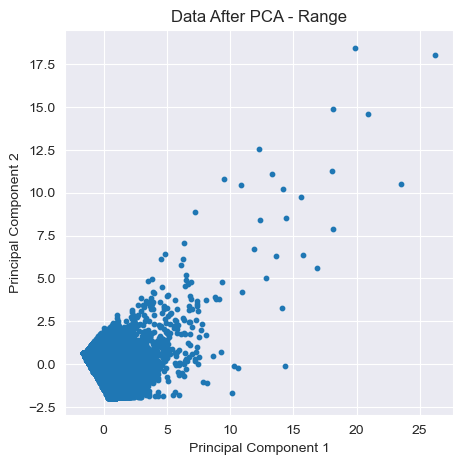

In [21]:
from sklearn.decomposition import PCA
# Create a PCA model
pca = PCA(n_components=2)

# Fit the PCA model on the normalized data
X_pca = pca.fit_transform(X_normed_range)

# The transformed data is in a NumPy array. This creates a new DataFrame
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Plot the data in 2D
plt.figure(figsize=(5, 5))
plt.scatter(X_pca['PC1'], X_pca['PC2'], s=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data After PCA - Range')
plt.show()

### PCA for std dev normalization

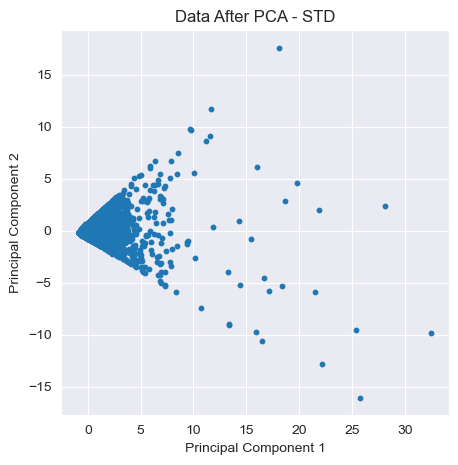

In [22]:
# Fit the PCA model on the normalized data
X_pca = pca.fit_transform(X_normed_std)

# The transformed data is in a NumPy array. This creates a new DataFrame
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Plot the data in 2D
plt.figure(figsize=(5, 5))   
plt.scatter(X_pca['PC1'], X_pca['PC2'], s=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data After PCA - STD')
plt.show()

## SVD for range norm

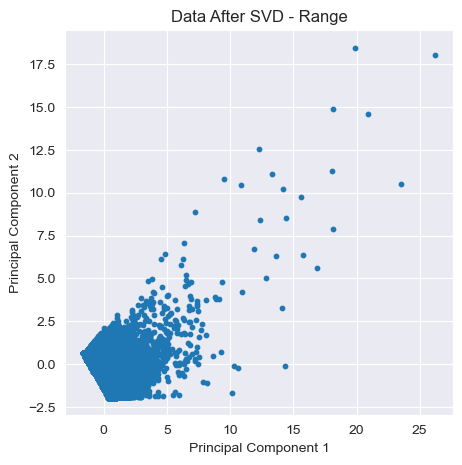

In [23]:
#apply SVD
from sklearn.decomposition import TruncatedSVD

# Create a TruncatedSVD model
svd = TruncatedSVD(n_components=2)

# Fit the SVD model on the normalized data
X_svd = svd.fit_transform(X_normed_range)

# The transformed data is in a NumPy array. This creates a new DataFrame
X_svd = pd.DataFrame(X_svd, columns=['PC1', 'PC2'])

# Plot the data in 2D
plt.figure(figsize=(5, 5))
plt.scatter(X_svd['PC1'], X_svd['PC2'], s=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data After SVD - Range')
plt.show()

## SVD for std dev norm

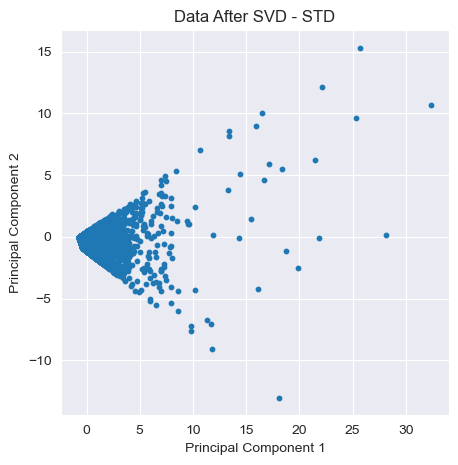

In [24]:
# Fit the SVD model on the normalized data std
X_svd = svd.fit_transform(X_normed_std)

# The transformed data is in a NumPy array. This creates a new DataFrame
X_svd = pd.DataFrame(X_svd, columns=['PC1', 'PC2'])

# Plot the data in 2D
plt.figure(figsize=(5, 5))
plt.scatter(X_svd['PC1'], X_svd['PC2'], s=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data After SVD - STD')
plt.show()
